In [76]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.pipeline import Pipeline
import seaborn as sns
from mpl_toolkits.mplot3d import Axes3D

In [77]:
#importing the datasets we're going to work with

ansur_male_df = pd.read_csv('data/ansur_height_measurements.csv')
reduced_df = ansur_male_df.drop(['forearmcircumferenceflexed','forearmforearmbreadth','forearmhandlength','functionalleglength','handbreadth','handcircumference','handlength','headbreadth','headcircumference'], axis=1)
reduced_df

,stature_m,buttockheight,wristcircumference,shouldercircumference
0,1.776,882,1054,273
1,1.702,870,1054,254
2,1.735,901,1041,268
3,1.655,821,968,249
4,1.914,1080,1245,302
...,...,...,...,...
245,1.836,981,1130,276
246,1.628,849,940,240
247,1.640,835,986,255
248,1.728,850,1003,263


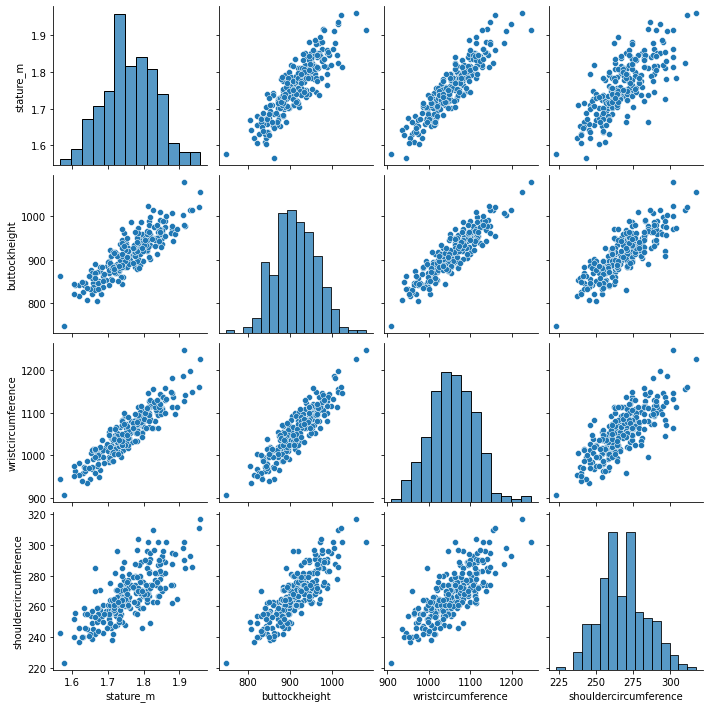

In [78]:
#visually inspecting a reduced version of the ansur dataset with only 4 features using Seaborn's pairplot()

sns.pairplot(reduced_df)
plt.show()

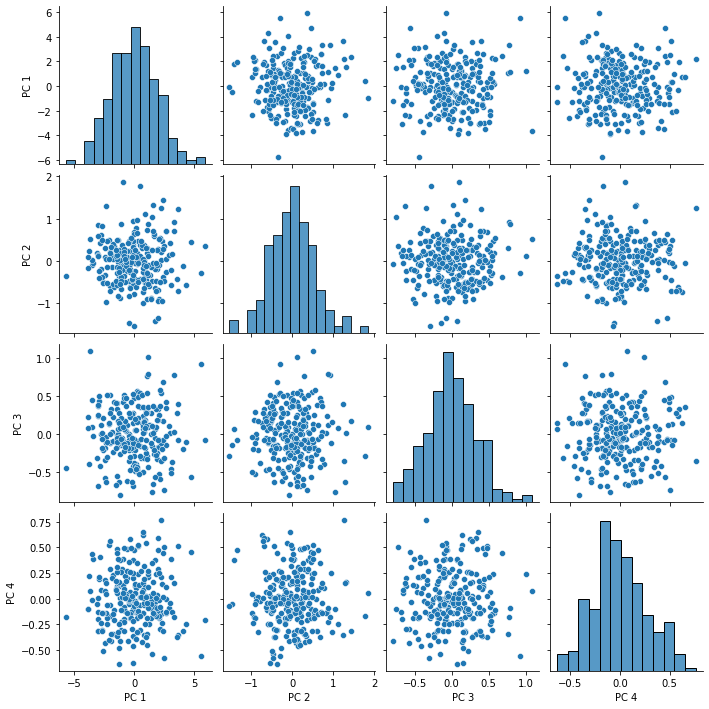

In [79]:
scaler = StandardScaler()
ansur_std = scaler.fit_transform(reduced_df) #standardizing the data

pca = PCA()
pc = pca.fit_transform(ansur_std) #Creating the PCA() instance and fit_transforming the standardized data.
pc_df = pd.DataFrame(pc, columns=['PC 1', 'PC 2', 'PC 3', 'PC 4']) #instanciating the new principal component dataframe

sns.pairplot(pc_df)
plt.show()

In [80]:
pca.explained_variance_ratio_.cumsum()

array([0.88111772, 0.95280916, 0.98183536, 1.        ])

In [81]:
#Dealing with the larger version of the dataset, we'll use a sklearn.pipeline.Pipeline to fit_transform the data

pipe = Pipeline([('scaler', StandardScaler()),
                 ('pca', PCA())])

pc = pipe.fit_transform(ansur_male_df)

print(pipe['pca'].explained_variance_ratio_) #explained variance of each component

[0.61620976 0.14638122 0.07080009 0.05279595 0.04397642 0.01950076
 0.01577159 0.01082878 0.00847451 0.00538464 0.00496766 0.00335699
 0.00155162]


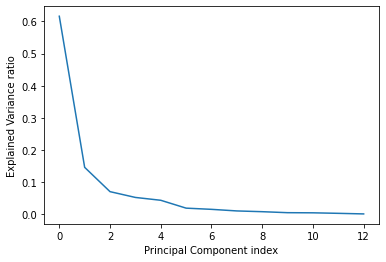

In [82]:
# Ploting the explained variance ratio.
plt.plot(pipe['pca'].explained_variance_ratio_)
plt.xlabel('Principal Component index')
plt.ylabel('Explained Variance ratio')
plt.show()

In [83]:
pipe['pca'].explained_variance_ratio_.cumsum()

array([0.61620976, 0.76259098, 0.83339107, 0.88618703, 0.93016345,
       0.94966421, 0.96543579, 0.97626457, 0.98473908, 0.99012372,
       0.99509139, 0.99844838, 1.        ])

Using the "elbow in the plot" technique, we'll make a more informed decision on the number of principal components to reduce our data, in this case the 'elbow' in the plot is at 3 components.

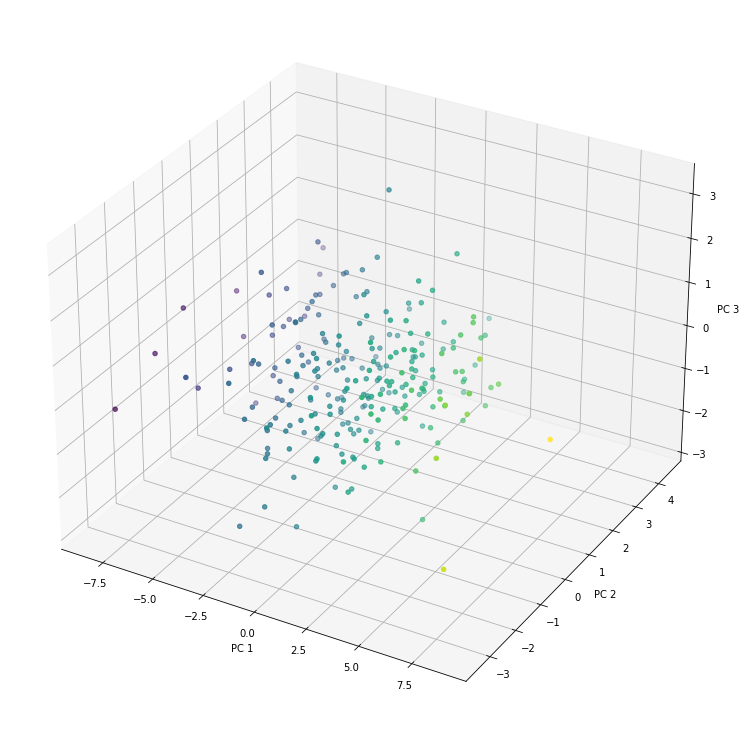

In [84]:
#visualizing the data reproduced by the 3 principal components using Axes3D from the mpl_toolkits.mplot3d lib
fig = plt.figure(figsize=(10,10))
ax = Axes3D(fig, auto_add_to_figure=False)
fig.add_axes(ax)

x = pc[:, 0]
y = pc[:, 1]
z = pc[:, 2]

ax.scatter(x, y, z, c=x, marker='o')
ax.set_xlabel('PC 1')
ax.set_ylabel('PC 2')
ax.set_zlabel('PC 3')
plt.show()